In [2]:
import pandas as pd
import urllib.request


data = pd.read_csv('../../../news/scraping_result/en/2019_down1/2019_down1_Coindesk.csv', error_bad_lines=False)
data = data.append(pd.read_csv('../../../news/scraping_result/en/2019_down1/2019_down1_Cointelegraph.csv',error_bad_lines=False))
data = data.append(pd.read_csv('../../../news/scraping_result/en/2019_down1/2019_down1_CryptoNews.csv', error_bad_lines=False))
data = data.append(pd.read_csv('../../../news/scraping_result/en/2019_down1/2019_down1_Forbes.csv', error_bad_lines=False))



In [3]:
text = data[['main article']]
text['main article'] = text['main article'].astype(str)
text['main article'] = text.apply(lambda row: row['main article'].replace("/"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("-"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("—"," "), axis=1)
#text['main article'] = text.apply(lambda row: row['main article'].replace("",""), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("*"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("…"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("\\"," "), axis=1)



/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [4]:
import nltk
text['main article'] = text.apply(lambda row: nltk.word_tokenize(row['main article']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
# 소문자 적용 , - 문자 삭제
text['main article'] = text['main article'].apply(lambda x : [word.lower().replace("-","") for word in x])
# 공백문자 삭제
text['main article'] = text['main article'].apply(lambda x : [word for word in x if word])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [6]:
from nltk.tag import pos_tag

text['pos tag'] = text.apply(lambda row: pos_tag(row['main article']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
# 불용어 품사 제거
text['main article'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('CC','CD','DT','EX','IN','LS','MD','PRP','PRP$','RB','TO','UH','WDT','WP','WP$','WRB')])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if word not in (stop)])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
import csv
stopword_list =[]
f = open('../../../stopword/stop_en.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['main article'] = text['main article'].apply(lambda x: [word for word in x if word not in stopword_list])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [10]:
import re
pattern=re.compile(r'\.')
print(pattern.search('abc.de'))

text['main article'] = text['main article'].apply(lambda x: [word for word in x if pattern.search(word)== None])

<re.Match object; span=(3, 4), match='.'>


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [11]:
number_pattern=re.compile(r'[0-9]\,[0-9]')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
native_number_pattern=re.compile(r'[0-9]')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if native_number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
star_pattern=re.compile(r'[a-z0-9*]\*[a-z0-9*]')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if star_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
from nltk.stem import WordNetLemmatizer
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) # 동사 
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='a') for word in x]) # 형용사
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='n') for word in x]) # 명사
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='r') for word in x]) # 부사
#print(text)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [15]:
tokenized_doc = text['main article'].apply(lambda x: [word for word in x if len(word) > 3])
#print(tokenized_doc)

In [16]:
article_contents = tokenized_doc.values.tolist()

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [18]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [19]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [20]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [21]:
word2id = defaultdict(lambda: 0)

In [22]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [23]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [24]:
len(tf_idf_result)

4954

In [25]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

4954


In [26]:
sentences = article_contents

In [27]:
from gensim.models import Word2Vec

In [28]:
model = Word2Vec(sentences, min_count=1)

In [29]:
len(model.wv.vocab)

4954

In [30]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [31]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [32]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [33]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [34]:
temp_cluster_result['cluster'] = assigned_clusters

In [35]:
temp_cluster_result['raw_data'] = X.tolist()

In [36]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [37]:
from sklearn.metrics import pairwise_distances

In [38]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [39]:
len(cosine_centroid_list)

4954

In [40]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [41]:
sum(temp_distance[3])

14.431781679216165

In [42]:
import scipy.spatial.distance as dist

In [43]:
dist.cosine(X[0],cosine_centroid_list[0])

7.606640211721416e-05

In [44]:
dist.euclidean(X[0],cosine_centroid_list[0])

2.1236182117720825

In [45]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [46]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [47]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(30)  # 거래

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
80,"[-0.42166954278945923, -0.04530123621225357, 0...",bitcoin,0,"[-0.028603675, -0.003131867, 0.04122103, -0.01...",0.000026,0.352365,0.647661,NaN
153,"[-0.3774457573890686, -0.03829028084874153, 0....",blockchain,0,"[-0.028603675, -0.003131867, 0.04122103, -0.01...",0.000026,0.254014,0.746012,NaN
39,"[-0.3507615923881531, -0.03701340779662132, 0....",crypto,0,"[-0.028603675, -0.003131867, 0.04122103, -0.01...",0.000034,0.204485,0.795549,NaN
28,"[-0.3105749487876892, -0.03277317062020302, 0....",trade,0,"[-0.028603675, -0.003131867, 0.04122103, -0.01...",0.000043,0.162031,0.838012,NaN
334,"[-0.29997527599334717, -0.029307372868061066, ...",company,0,"[-0.028603675, -0.003131867, 0.04122103, -0.01...",0.000038,0.154248,0.845790,NaN
36,"[-0.3030575215816498, -0.03174693509936333, 0....",market,0,"[-0.028603675, -0.003131867, 0.04122103, -0.01...",0.000048,0.154248,0.845800,NaN
76,"[-0.29694557189941406, -0.03482967987656593, 0...",cryptocurrency,0,"[-0.028603675, -0.003131867, 0.04122103, -0.01...",0.000047,0.147173,0.852875,NaN
213,"[-0.29680803418159485, -0.030872326344251633, ...",exchange,0,"[-0.028603675, -0.003131867, 0.04122103, -0.01...",0.000050,0.137267,0.862784,NaN
167,"[-0.29430899024009705, -0.02460114285349846, 0...",digital,0,"[-0.028603675, -0.003131867, 0.04122103, -0.01...",0.000072,0.135852,0.864220,NaN
168,"[-0.2929898500442505, -0.025665121152997017, 0...",currency,0,"[-0.028603675, -0.003131867, 0.04122103, -0.01...",0.000064,0.126653,0.873410,NaN


In [48]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 부정

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
3276,"[-0.010249401442706585, -0.005333446431905031,...",cfius,1,"[-0.004266447, -0.0006805897, 0.00606493, -0.0...",0.014760,0.002123,1.012637,NaN
514,"[-0.015158872120082378, -0.0010132604511454701...",fake,1,"[-0.004266447, -0.0006805897, 0.00606493, -0.0...",0.017347,0.003538,1.013810,NaN
2915,"[-0.015398997813463211, -0.0025860394816845655...",sufficient,1,"[-0.004266447, -0.0006805897, 0.00606493, -0.0...",0.020746,0.002830,1.017915,NaN
2008,"[-0.009183541871607304, -0.0023339432664215565...",bureau,1,"[-0.004266447, -0.0006805897, 0.00606493, -0.0...",0.020347,0.002123,1.018224,NaN
2730,"[-0.015811756253242493, -0.005781443323940039,...",evasion,1,"[-0.004266447, -0.0006805897, 0.00606493, -0.0...",0.024731,0.002123,1.022608,NaN
792,"[-0.005310600157827139, -0.0026324852369725704...",elaborate,1,"[-0.004266447, -0.0006805897, 0.00606493, -0.0...",0.024974,0.002123,1.022851,NaN
1495,"[-0.013193391263484955, -0.0015707432758063078...",hurdle,1,"[-0.004266447, -0.0006805897, 0.00606493, -0.0...",0.026274,0.002123,1.024152,NaN
1222,"[-0.009176723659038544, 0.0030677278991788626,...",steve,1,"[-0.004266447, -0.0006805897, 0.00606493, -0.0...",0.027575,0.001415,1.026160,NaN
4016,"[-0.012814625166356564, -0.004527583252638578,...",favorite,1,"[-0.004266447, -0.0006805897, 0.00606493, -0.0...",0.034793,0.001415,1.033378,NaN
3637,"[-0.012663198634982109, 0.0025274839717894793,...",icos,1,"[-0.004266447, -0.0006805897, 0.00606493, -0.0...",0.036492,0.002830,1.033661,NaN


In [49]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(40)   # 인플

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1000,"[-0.011862956918776035, -0.000828427670057863,...",mouth,2,"[-0.0027699969, 0.00028461887, 0.004916891, -0...",0.025317,0.001415,1.023902,NaN
4367,"[-0.005955078639090061, 0.0018649384146556258,...",amoils,2,"[-0.0027699969, 0.00028461887, 0.004916891, -0...",0.028789,0.002123,1.026666,NaN
3426,"[-0.005336663220077753, 0.001661104615777731, ...",marketmach,2,"[-0.0027699969, 0.00028461887, 0.004916891, -0...",0.031629,0.001415,1.030214,NaN
948,"[-0.007155916187912226, 0.001633079838939011, ...",plead,2,"[-0.0027699969, 0.00028461887, 0.004916891, -0...",0.032676,0.001415,1.031260,NaN
1686,"[-0.01047306228429079, -0.0030410471372306347,...",custodian,2,"[-0.0027699969, 0.00028461887, 0.004916891, -0...",0.033737,0.002123,1.031614,NaN
4180,"[-0.01000270340591669, 0.0028944045770913363, ...",enthusiasm,2,"[-0.0027699969, 0.00028461887, 0.004916891, -0...",0.035055,0.002123,1.032933,NaN
1774,"[-0.00942694116383791, -0.003476076992228627, ...",siddhartha,2,"[-0.0027699969, 0.00028461887, 0.004916891, -0...",0.038384,0.001415,1.036969,NaN
4822,"[-0.011358119547367096, 0.0015153170097619295,...",glide,2,"[-0.0027699969, 0.00028461887, 0.004916891, -0...",0.038825,0.001415,1.037410,NaN
601,"[-0.007649982813745737, 0.0006171395070850849,...",pending,2,"[-0.0027699969, 0.00028461887, 0.004916891, -0...",0.039980,0.002123,1.037857,NaN
3098,"[-0.010050208307802677, -0.0024116928689181805...",flat,2,"[-0.0027699969, 0.00028461887, 0.004916891, -0...",0.041573,0.001415,1.040158,NaN


In [50]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(20)  # 기타

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
3305,"[-0.013317437842488289, -0.004052267875522375,...",bakkt,3,"[-0.0034319637, -0.00014950855, 0.0044540036, ...",0.032053,0.002123,1.029930,NaN
2040,"[-0.011901852674782276, -0.0003020242438651621...",insolvency,3,"[-0.0034319637, -0.00014950855, 0.0044540036, ...",0.036875,0.001415,1.035460,NaN
3052,"[-0.008062825538218021, -0.0029317918233573437...",hurry,3,"[-0.0034319637, -0.00014950855, 0.0044540036, ...",0.043571,0.001415,1.042156,NaN
3171,"[-0.008158148266375065, 0.0026618640404194593,...",rupee,3,"[-0.0034319637, -0.00014950855, 0.0044540036, ...",0.059796,0.001415,1.058381,NaN
2858,"[-0.008801604621112347, -0.005598759278655052,...",recession,3,"[-0.0034319637, -0.00014950855, 0.0044540036, ...",0.060153,0.001415,1.058738,NaN
4306,"[-0.004366593435406685, 0.003820514539256692, ...",dickson,3,"[-0.0034319637, -0.00014950855, 0.0044540036, ...",0.068300,0.001415,1.066885,NaN
4109,"[-0.009990232065320015, -0.005181305110454559,...",safety,3,"[-0.0034319637, -0.00014950855, 0.0044540036, ...",0.069747,0.001415,1.068331,NaN
982,"[-0.00810156762599945, -0.00024238138576038182...",irregular,3,"[-0.0034319637, -0.00014950855, 0.0044540036, ...",0.071036,0.000708,1.070329,NaN
3868,"[-0.009324869140982628, 0.0010680980049073696,...",dark,3,"[-0.0034319637, -0.00014950855, 0.0044540036, ...",0.073824,0.001415,1.072409,NaN
2083,"[-0.006412857212126255, 0.0033321205992251635,...",comparable,3,"[-0.0034319637, -0.00014950855, 0.0044540036, ...",0.075959,0.001415,1.074544,NaN


In [51]:
y_km = temp_cluster_result['cluster'].values

In [52]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

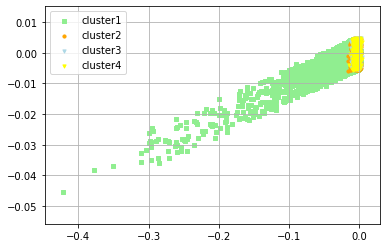

In [53]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [54]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 거래

3413

In [55]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 부정 

605

In [56]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 인플

572

In [57]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 기타

364

In [58]:
# X[:,1]
from sklearn.cluster import AgglomerativeClustering
import numpy as np

agg = AgglomerativeClustering(n_clusters=4, linkage ="average", affinity="cosine")

assign = agg.fit_predict(X)
# assign = agg.fit(X)

In [59]:
len(assign)

4954

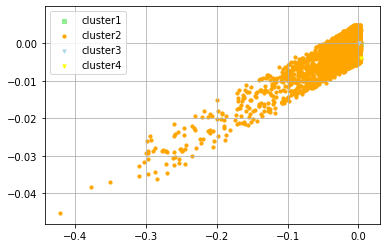

In [60]:
plt.scatter(X[assign==0,0],X[assign==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[assign==1,0],X[assign==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[assign==2,0],X[assign==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[assign==3,0],X[assign==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [61]:
assign

array([1, 1, 1, ..., 1, 1, 1])

In [62]:
from scipy.cluster.hierarchy import dendrogram

In [63]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

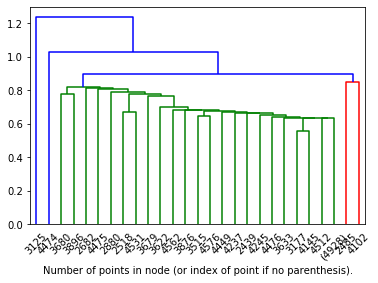

In [64]:

model1 = AgglomerativeClustering(linkage ="average", affinity="cosine", distance_threshold=0, n_clusters=None)

model1.fit(X)

plot_dendrogram(model1, truncate_mode='level', p=20)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [65]:
temp_cluster_result0 = pd.DataFrame(columns=temp_heder)

In [66]:
temp_cluster_result0['word'] = list(model.wv.vocab)

In [67]:
temp_cluster_result0['cluster'] = assign

In [68]:
temp_cluster_result0['raw_data'] = X.tolist()

In [69]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
clf = NearestCentroid()
clf.fit(X, assign)

temp_cluster_result0['centroid'] = temp_cluster_result0['cluster'].apply(lambda x : clf.centroids_[x])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.nearest_centroid module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [70]:
cosine_centroid_list0 = []
for cosine_centroid in temp_cluster_result0['centroid'] :
    cosine_centroid_list0.append(cosine_centroid.tolist())

In [71]:
temp_distance0 = pairwise_distances(X,cosine_centroid_list0, metric='cosine')

In [72]:
temp_cluster_result0['distance'] = temp_cluster_result0.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [73]:
temp_cluster_result0['tfidf'] = tf_idf_value
temp_cluster_result0['score'] = temp_cluster_result0.apply(lambda x : x.distance + (1- x.tfidf),axis=1)

In [74]:
temp_cluster_result0[temp_cluster_result0['cluster']==0].sort_values(by=['score']).head(20)  # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
2485,"[0.003140476532280445, -0.0030343320686370134,...",inblockchain,0,"[0.0034521962516009808, -0.0015863378066569567...",0.236533,0.000708,1.235825,NaN
4102,"[0.00376391620375216, -0.000138343486469239, 0...",coinbits,0,"[0.0034521962516009808, -0.0015863378066569567...",0.245567,0.000708,1.244859,NaN


In [75]:
temp_cluster_result0[temp_cluster_result0['cluster']==1].sort_values(by=['score']).head(20)  # 거래소 비즈  

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
80,"[-0.42166954278945923, -0.04530123621225357, 0...",bitcoin,1,"[-0.020818399265408516, -0.0022192250471562147...",0.000025,0.352365,0.647660,NaN
153,"[-0.3774457573890686, -0.03829028084874153, 0....",blockchain,1,"[-0.020818399265408516, -0.0022192250471562147...",0.000029,0.254014,0.746015,NaN
39,"[-0.3507615923881531, -0.03701340779662132, 0....",crypto,1,"[-0.020818399265408516, -0.0022192250471562147...",0.000032,0.204485,0.795547,NaN
28,"[-0.3105749487876892, -0.03277317062020302, 0....",trade,1,"[-0.020818399265408516, -0.0022192250471562147...",0.000042,0.162031,0.838011,NaN
334,"[-0.29997527599334717, -0.029307372868061066, ...",company,1,"[-0.020818399265408516, -0.0022192250471562147...",0.000035,0.154248,0.845787,NaN
36,"[-0.3030575215816498, -0.03174693509936333, 0....",market,1,"[-0.020818399265408516, -0.0022192250471562147...",0.000045,0.154248,0.845797,NaN
76,"[-0.29694557189941406, -0.03482967987656593, 0...",cryptocurrency,1,"[-0.020818399265408516, -0.0022192250471562147...",0.000044,0.147173,0.852872,NaN
213,"[-0.29680803418159485, -0.030872326344251633, ...",exchange,1,"[-0.020818399265408516, -0.0022192250471562147...",0.000049,0.137267,0.862782,NaN
167,"[-0.29430899024009705, -0.02460114285349846, 0...",digital,1,"[-0.020818399265408516, -0.0022192250471562147...",0.000069,0.135852,0.864217,NaN
168,"[-0.2929898500442505, -0.025665121152997017, 0...",currency,1,"[-0.020818399265408516, -0.0022192250471562147...",0.000061,0.126653,0.873407,NaN


In [76]:
temp_cluster_result0[temp_cluster_result0['cluster']==2].sort_values(by=['score']).head(20)  # 기타

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
4474,"[0.0011783648515120149, -1.5593808711855672e-0...",shun,2,"[0.0011783648515120149, -1.5593808711855672e-0...",0.0,0.000708,0.999292,NaN


In [77]:
temp_cluster_result0[temp_cluster_result0['cluster']==3].sort_values(by=['score']).head(20)  #  암호화폐

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
3125,"[0.003754270263016224, -0.004080359824001789, ...",luno,3,"[0.003754270263016224, -0.004080359824001789, ...",0.0,0.000708,0.999292,NaN


In [78]:
len(temp_cluster_result0[temp_cluster_result0['cluster']==0]) # 투자

2

In [79]:
len(temp_cluster_result0[temp_cluster_result0['cluster']==1]) # 비즈 거래

4950

In [80]:
len(temp_cluster_result0[temp_cluster_result0['cluster']==2]) # 기타

1

In [81]:
len(temp_cluster_result0[temp_cluster_result0['cluster']==3]) # 암호화폐

1

In [83]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(X, assign, metric='cosine')

In [85]:
silhouette_score

0.76928663

In [86]:
"""
temp_cluster_result['category'] = 1 # 1 영문뉴스, 2 국문뉴스 , 3 twitter
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 7 # 비즈
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 12 #  가격, 거래소, 돈
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label'] = 9 # 기술발전
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 7 # 비즈
"""

"\ntemp_cluster_result['category'] = 1 # 1 영문뉴스, 2 국문뉴스 , 3 twitter\ntemp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 7 # 비즈\ntemp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 12 #  가격, 거래소, 돈\ntemp_cluster_result.loc[temp_cluster_result['cluster']==2,'label'] = 9 # 기술발전\ntemp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 7 # 비즈\n"

In [87]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(n_clusters=4)

In [88]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [89]:
kmeans.inertia_

85.75178527832031

In [90]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[1 3 1 ... 3 3 3]


In [91]:
cluster_values= list(model.wv.vocab)

In [92]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-85.75178527832031


In [93]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [94]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.7315433


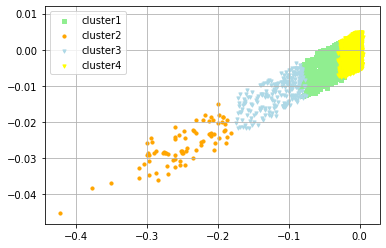

In [95]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [96]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [97]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [98]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [99]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [100]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [101]:
import scipy.spatial.distance as dist

In [102]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [103]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [104]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(30,'score') # 부정

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
3663,"[-0.04586906358599663, -0.008276625536382198, ...",siemens,0,"[-0.045993157, -0.0049461573, 0.06653569, -0.0...",0.027877,0.014859,1.013018,NaN
384,"[-0.04947637394070625, -0.005572170484811068, ...",facilitate,0,"[-0.045993157, -0.0049461573, 0.06653569, -0.0...",0.027148,0.012029,1.015119,NaN
564,"[-0.049448322504758835, -0.0015653237933292985...",size,0,"[-0.045993157, -0.0049461573, 0.06653569, -0.0...",0.026926,0.011321,1.015605,NaN
979,"[-0.04645770043134689, -0.007456232327967882, ...",japan,0,"[-0.045993157, -0.0049461573, 0.06653569, -0.0...",0.028757,0.012736,1.016021,NaN
439,"[-0.05103639140725136, -0.006436544470489025, ...",donald,0,"[-0.045993157, -0.0049461573, 0.06653569, -0.0...",0.029131,0.012736,1.016395,NaN
298,"[-0.04560989886522293, -0.008235670626163483, ...",daily,0,"[-0.045993157, -0.0049461573, 0.06653569, -0.0...",0.027180,0.009906,1.017274,NaN
1947,"[-0.048204995691776276, -0.0010559075744822621...",management,0,"[-0.045993157, -0.0049461573, 0.06653569, -0.0...",0.031498,0.014151,1.017347,NaN
2351,"[-0.04256820306181908, -0.004543995950371027, ...",entrepreneur,0,"[-0.045993157, -0.0049461573, 0.06653569, -0.0...",0.027327,0.009906,1.017421,NaN
4460,"[-0.05194414407014847, -0.0033393038902431726,...",wyoming,0,"[-0.045993157, -0.0049461573, 0.06653569, -0.0...",0.030327,0.012736,1.017591,NaN
143,"[-0.0427447184920311, -0.0016980440123006701, ...",mention,0,"[-0.045993157, -0.0049461573, 0.06653569, -0.0...",0.028716,0.010613,1.018103,NaN


In [105]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(40,'score') # 긍정

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
302,"[-0.24529770016670227, -0.032049864530563354, ...",base,1,"[-0.24796982, -0.026552206, 0.35892782, -0.140...",0.046197,0.091983,0.954214,NaN
53,"[-0.24694450199604034, -0.022657670080661774, ...",cryptocurrencies,1,"[-0.24796982, -0.026552206, 0.35892782, -0.140...",0.038467,0.078539,0.959928,NaN
503,"[-0.24846377968788147, -0.028716998174786568, ...",provide,1,"[-0.24796982, -0.026552206, 0.35892782, -0.140...",0.030419,0.067926,0.962493,NaN
85,"[-0.2498950958251953, -0.028088998049497604, 0...",high,1,"[-0.24796982, -0.026552206, 0.35892782, -0.140...",0.032624,0.067218,0.965406,NaN
41,"[-0.2536785304546356, -0.030760066583752632, 0...",accord,1,"[-0.24796982, -0.026552206, 0.35892782, -0.140...",0.039137,0.067218,0.971919,NaN
348,"[-0.24641157686710358, -0.024508036673069, 0.3...",network,1,"[-0.24796982, -0.026552206, 0.35892782, -0.140...",0.045255,0.072171,0.973084,NaN
742,"[-0.24971118569374084, -0.028589917346835136, ...",technology,1,"[-0.24796982, -0.026552206, 0.35892782, -0.140...",0.052168,0.073586,0.978582,NaN
471,"[-0.2532854378223419, -0.03203093633055687, 0....",platform,1,"[-0.24796982, -0.026552206, 0.35892782, -0.140...",0.071441,0.087030,0.984411,NaN
195,"[-0.25157976150512695, -0.02811386249959469, 0...",libra,1,"[-0.24796982, -0.026552206, 0.35892782, -0.140...",0.080009,0.087030,0.992980,NaN
236,"[-0.2543717324733734, -0.02357776276767254, 0....",facebook,1,"[-0.24796982, -0.026552206, 0.35892782, -0.140...",0.079393,0.078539,1.000854,NaN


In [106]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(30,'score')  # 제도,한계

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1767,"[-0.11145591735839844, -0.006357445381581783, ...",increase,2,"[-0.11443181, -0.0119211525, 0.16553763, -0.06...",0.029590,0.029010,1.000580,NaN
1014,"[-0.11547770351171494, -0.009329835884273052, ...",private,2,"[-0.11443181, -0.0119211525, 0.16553763, -0.06...",0.030171,0.027595,1.002577,NaN
644,"[-0.11100819706916809, -0.012633192352950573, ...",risk,2,"[-0.11443181, -0.0119211525, 0.16553763, -0.06...",0.031578,0.027595,1.003983,NaN
871,"[-0.11856164038181305, -0.010018219240009785, ...",online,2,"[-0.11443181, -0.0119211525, 0.16553763, -0.06...",0.034577,0.027595,1.006982,NaN
410,"[-0.11703319102525711, -0.009641159325838089, ...",information,2,"[-0.11443181, -0.0119211525, 0.16553763, -0.06...",0.032750,0.025472,1.007278,NaN
507,"[-0.11602672934532166, -0.013001030310988426, ...",cash,2,"[-0.11443181, -0.0119211525, 0.16553763, -0.06...",0.038181,0.029718,1.008463,NaN
1093,"[-0.11355985701084137, -0.0117137860506773, 0....",block,2,"[-0.11443181, -0.0119211525, 0.16553763, -0.06...",0.039042,0.029718,1.009324,NaN
71,"[-0.11962224543094635, -0.011658236384391785, ...",order,2,"[-0.11443181, -0.0119211525, 0.16553763, -0.06...",0.039638,0.029010,1.010628,NaN
455,"[-0.12031390517950058, -0.016279343515634537, ...",amount,2,"[-0.11443181, -0.0119211525, 0.16553763, -0.06...",0.037428,0.025472,1.011956,NaN
1210,"[-0.1167345941066742, -0.01032121293246746, 0....",keep,2,"[-0.11443181, -0.0119211525, 0.16553763, -0.06...",0.036962,0.024057,1.012905,NaN


In [107]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(30,'score') #  기타

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1863,"[-0.0032253966201096773, -0.001127248862758278...",array,3,"[-0.0074294545, -0.0008005478, 0.010677049, -0...",0.024593,0.002123,1.022471,NaN
2998,"[-0.011764584109187126, -0.0008386990521103144...",indirect,3,"[-0.0074294545, -0.0008005478, 0.010677049, -0...",0.026231,0.002123,1.024109,NaN
2881,"[-0.011860852129757404, 0.0006787428865209222,...",donation,3,"[-0.0074294545, -0.0008005478, 0.010677049, -0...",0.026456,0.002123,1.024333,NaN
4107,"[-0.011605249717831612, 0.0013819709420204163,...",catalyst,3,"[-0.0074294545, -0.0008005478, 0.010677049, -0...",0.025810,0.001415,1.024395,NaN
1551,"[-0.0031497187446802855, 0.001088149263523519,...",apparent,3,"[-0.0074294545, -0.0008005478, 0.010677049, -0...",0.026520,0.002123,1.024397,NaN
3061,"[-0.005095369182527065, -0.0042321099899709225...",auxpow,3,"[-0.0074294545, -0.0008005478, 0.010677049, -0...",0.026087,0.001415,1.024671,NaN
704,"[-0.009700954891741276, -0.002167976927012205,...",preserve,3,"[-0.0074294545, -0.0008005478, 0.010677049, -0...",0.026861,0.002123,1.024738,NaN
3472,"[-0.0043946425430476665, -0.005156693980097771...",frictionless,3,"[-0.0074294545, -0.0008005478, 0.010677049, -0...",0.027312,0.002123,1.025189,NaN
3270,"[-0.008488018997013569, 0.001363287097774446, ...",spearhead,3,"[-0.0074294545, -0.0008005478, 0.010677049, -0...",0.026656,0.001415,1.025241,NaN
4885,"[-0.007922480814158916, 0.0013569565489888191,...",mode,3,"[-0.0074294545, -0.0008005478, 0.010677049, -0...",0.026659,0.001415,1.025244,NaN


In [108]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) # 투자

606

In [109]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) # 비즈

79

In [110]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) # 이슈

223

In [111]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) # 인플

4046

In [112]:
agg1 = AgglomerativeClustering(n_clusters=4, linkage ="average", affinity="euclidean")

assign1 = agg1.fit_predict(X)

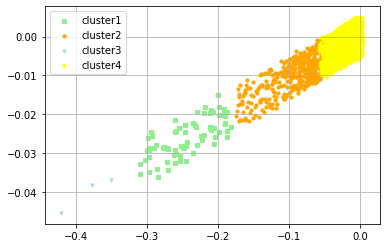

In [113]:
plt.scatter(X[assign1==0,0],X[assign1==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[assign1==1,0],X[assign1==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[assign1==2,0],X[assign1==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[assign1==3,0],X[assign1==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [114]:
temp_cluster_result2 = pd.DataFrame(columns=temp_heder)
temp_cluster_result2['word'] = list(model.wv.vocab)
temp_cluster_result2['cluster'] = assign1
temp_cluster_result2['raw_data'] = X.tolist()
clf1 = NearestCentroid()
clf1.fit(X, assign1)

NearestCentroid()

In [115]:
temp_cluster_result2['centroid'] = temp_cluster_result2['cluster'].apply(lambda x : clf1.centroids_[x])

In [116]:
euclidean_centroid_list2 = []
for euclidean_centroid in temp_cluster_result2['centroid'] :
    euclidean_centroid_list2.append(euclidean_centroid.tolist())

In [117]:

temp_distance2 = pairwise_distances(X,euclidean_centroid_list2, metric='euclidean')

In [118]:
temp_cluster_result2['distance'] = temp_cluster_result2.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [119]:
temp_cluster_result2['tfidf'] = tf_idf_value
temp_cluster_result2['score'] = temp_cluster_result2.apply(lambda x : x.distance + (1- x.tfidf),axis=1)

In [120]:
temp_cluster_result2[temp_cluster_result2['cluster']==0].sort_values(by=['score']).head(20) #  기술, 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
302,"[-0.24529770016670227, -0.032049864530563354, ...",base,0,"[-0.2426280677318573, -0.026013411581516266, 0...",0.042896,0.091983,0.950914,NaN
742,"[-0.24971118569374084, -0.028589917346835136, ...",technology,0,"[-0.2426280677318573, -0.026013411581516266, 0...",0.036961,0.073586,0.963374,NaN
470,"[-0.24456173181533813, -0.028204871341586113, ...",investment,0,"[-0.2426280677318573, -0.026013411581516266, 0...",0.031401,0.062265,0.969136,NaN
652,"[-0.23530104756355286, -0.029983224347233772, ...",system,0,"[-0.2426280677318573, -0.026013411581516266, 0...",0.050327,0.073586,0.976741,NaN
436,"[-0.24361540377140045, -0.02719695493578911, 0...",people,0,"[-0.2426280677318573, -0.026013411581516266, 0...",0.038776,0.059435,0.979341,NaN
53,"[-0.24694450199604034, -0.022657670080661774, ...",cryptocurrencies,0,"[-0.2426280677318573, -0.026013411581516266, 0...",0.059216,0.078539,0.980677,NaN
503,"[-0.24846377968788147, -0.028716998174786568, ...",provide,0,"[-0.2426280677318573, -0.026013411581516266, 0...",0.065015,0.067926,0.997089,NaN
85,"[-0.2498950958251953, -0.028088998049497604, 0...",high,0,"[-0.2426280677318573, -0.026013411581516266, 0...",0.069823,0.067218,1.002605,NaN
41,"[-0.2536785304546356, -0.030760066583752632, 0...",accord,0,"[-0.2426280677318573, -0.026013411581516266, 0...",0.093059,0.067218,1.025841,NaN
666,"[-0.23061668872833252, -0.023218441754579544, ...",transaction,0,"[-0.2426280677318573, -0.026013411581516266, 0...",0.088924,0.061558,1.027367,NaN


In [121]:
temp_cluster_result2[temp_cluster_result2['cluster']==1].sort_values(by=['score']).head(20) #  이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
188,"[-0.0936269462108612, -0.009366924874484539, 0...",committee,1,"[-0.09315511584281921, -0.009866876527667046, ...",0.029011,0.023349,1.005662,NaN
540,"[-0.09027128666639328, -0.010346068069338799, ...",legal,1,"[-0.09315511584281921, -0.009866876527667046, ...",0.026437,0.019104,1.007333,NaN
102,"[-0.09147568792104721, -0.013605271466076374, ...",press,1,"[-0.09315511584281921, -0.009866876527667046, ...",0.031609,0.023349,1.008259,NaN
1717,"[-0.09545120596885681, -0.009970244020223618, ...",figure,1,"[-0.09315511584281921, -0.009866876527667046, ...",0.030919,0.021227,1.009692,NaN
508,"[-0.09092894196510315, -0.009208097122609615, ...",official,1,"[-0.09315511584281921, -0.009866876527667046, ...",0.029837,0.019812,1.010025,NaN
18,"[-0.09990550577640533, -0.007048859726637602, ...",bring,1,"[-0.09315511584281921, -0.009866876527667046, ...",0.036902,0.022642,1.014261,NaN
655,"[-0.09944014996290207, -0.005748388357460499, ...",program,1,"[-0.09315511584281921, -0.009866876527667046, ...",0.038235,0.021934,1.016300,NaN
27,"[-0.09965712577104568, -0.008824249729514122, ...",total,1,"[-0.09315511584281921, -0.009866876527667046, ...",0.038427,0.021934,1.016493,NaN
2167,"[-0.09184950590133667, -0.006299048196524382, ...",captive,1,"[-0.09315511584281921, -0.009866876527667046, ...",0.036179,0.018397,1.017782,NaN
460,"[-0.09557507187128067, -0.007764332462102175, ...",china,1,"[-0.09315511584281921, -0.009866876527667046, ...",0.040351,0.021934,1.018416,NaN


In [122]:
temp_cluster_result2[temp_cluster_result2['cluster']==2].sort_values(by=['score']).head(20) # 암호화폐

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
153,"[-0.3774457573890686, -0.03829028084874153, 0....",blockchain,2,"[-0.3832922875881195, -0.040201637893915176, 0...",0.038865,0.254014,0.784851,NaN
80,"[-0.42166954278945923, -0.04530123621225357, 0...",bitcoin,2,"[-0.3832922875881195, -0.040201637893915176, 0...",0.408004,0.352365,1.055639,NaN
39,"[-0.3507615923881531, -0.03701340779662132, 0....",crypto,2,"[-0.3832922875881195, -0.040201637893915176, 0...",0.379656,0.204485,1.175172,NaN


In [123]:
temp_cluster_result2[temp_cluster_result2['cluster']==3].sort_values(by=['score']).head(20) # 비즈 인플

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
2602,"[-0.00955040380358696, -0.0002493977954145521,...",pboc,3,"[-0.010358269326388836, -0.0011096242815256119...",0.026141,0.002830,1.023311,NaN
2238,"[-0.010160922072827816, -0.0014475631760433316...",meaningful,3,"[-0.010358269326388836, -0.0011096242815256119...",0.025575,0.002123,1.023452,NaN
1318,"[-0.011308574117720127, -0.005359701346606016,...",vendor,3,"[-0.010358269326388836, -0.0011096242815256119...",0.026349,0.002830,1.023519,NaN
3683,"[-0.00969775766134262, -0.0036143579054623842,...",galileo,3,"[-0.010358269326388836, -0.0011096242815256119...",0.026768,0.002830,1.023938,NaN
1045,"[-0.007137284614145756, -0.002519170753657818,...",comprise,3,"[-0.010358269326388836, -0.0011096242815256119...",0.026116,0.002123,1.023993,NaN
978,"[-0.008146798238158226, -0.005112008191645145,...",gazette,3,"[-0.010358269326388836, -0.0011096242815256119...",0.026455,0.002123,1.024333,NaN
3154,"[-0.011246414855122566, -0.0028466845396906137...",tokyo,3,"[-0.010358269326388836, -0.0011096242815256119...",0.026631,0.002123,1.024508,NaN
3807,"[-0.0076567642390728, -0.004941582214087248, 0...",banxico,3,"[-0.010358269326388836, -0.0011096242815256119...",0.027471,0.002830,1.024640,NaN
2691,"[-0.008329086937010288, -0.0002202797186328098...",entry,3,"[-0.010358269326388836, -0.0011096242815256119...",0.027510,0.002830,1.024680,NaN
3169,"[-0.011190829798579216, 4.842064299737103e-05,...",cryptographic,3,"[-0.010358269326388836, -0.0011096242815256119...",0.026864,0.002123,1.024741,NaN


In [124]:
len(temp_cluster_result2[temp_cluster_result2['cluster']==0]) # 기술, 투자 

76

In [125]:
len(temp_cluster_result2[temp_cluster_result2['cluster']==1]) # 이슈 

398

In [126]:
len(temp_cluster_result2[temp_cluster_result2['cluster']==2]) # 암호화폐

3

In [127]:
len(temp_cluster_result2[temp_cluster_result2['cluster']==3]) # 비즈니스, 인플

4477

In [128]:
silhouette_score1 = metrics.silhouette_score(X, assign1, metric='euclidean')

In [129]:
silhouette_score1

0.8118686

In [ ]:
agg2 = AgglomerativeClustering(n_clusters=4, linkage ="ward", affinity="euclidean")

assign2 = agg2.fit_predict(X)

In [ ]:
plt.scatter(X[assign2==0,0],X[assign2==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[assign2==1,0],X[assign2==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[assign2==2,0],X[assign2==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[assign2==3,0],X[assign2==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [ ]:
temp_cluster_result3 = pd.DataFrame(columns=temp_heder)
temp_cluster_result3['word'] = list(model.wv.vocab)
temp_cluster_result3['cluster'] = assign2
temp_cluster_result3['raw_data'] = X.tolist()
clf2 = NearestCentroid()
clf2.fit(X, assign2)

In [ ]:
temp_cluster_result3['centroid'] = temp_cluster_result3['cluster'].apply(lambda x : clf2.centroids_[x])

In [ ]:
euclidean_centroid_list3 = []
for euclidean_centroid in temp_cluster_result3['centroid'] :
    euclidean_centroid_list3.append(euclidean_centroid.tolist())

In [ ]:
temp_distance3 = pairwise_distances(X,euclidean_centroid_list3, metric='euclidean')

In [ ]:
temp_cluster_result3['distance'] = temp_cluster_result3.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

temp_cluster_result3['tfidf'] = tf_idf_value
temp_cluster_result3['score'] = temp_cluster_result3.apply(lambda x : x.distance + (1- x.tfidf),axis=1)

In [ ]:
temp_cluster_result3[temp_cluster_result3['cluster']==0].sort_values(by=['score']).head(20)

In [ ]:
temp_cluster_result3[temp_cluster_result3['cluster']==1].sort_values(by=['score']).head(20)

In [ ]:
temp_cluster_result3[temp_cluster_result3['cluster']==2].sort_values(by=['score']).head(20)

In [ ]:
temp_cluster_result3[temp_cluster_result3['cluster']==3].sort_values(by=['score']).head(20)

In [ ]:
len(temp_cluster_result3[temp_cluster_result3['cluster']==0])

In [ ]:
len(temp_cluster_result3[temp_cluster_result3['cluster']==1])

In [ ]:
len(temp_cluster_result3[temp_cluster_result3['cluster']==2])

In [ ]:
len(temp_cluster_result3[temp_cluster_result3['cluster']==3])

In [ ]:
silhouette_score3 = metrics.silhouette_score(X, assign2, metric='euclidean')

In [ ]:
silhouette_score3

In [ ]:

"""
temp_cluster_result1['result'] = 1 # 1 상승 2 하락 3 보합
temp_cluster_result['result'] = 1
temp_cluster_result1['Silhouette'] = 0.7476496# 1 상승 2 하락 3 보합
temp_cluster_result['Silhouette'] = 0.7476496
 """

In [ ]:
#temp_cluster_result1.to_csv("../cluster/en_news/2017_up2/en_news_2017_up2_euclidean.csv")
#temp_cluster_result.to_csv("../cluster/en_news/2017_up2/en_news_2017_up2_cosine.csv")